In [110]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
sns.set(style="whitegrid", font_scale=1.2, context="talk", palette=sns.color_palette("bright"), color_codes=False)
matplotlib.rcParams['mathtext.fontset'] = 'cm'

In [112]:
x = 5*np.random.randn(25,1) + 70

In [113]:
x

array([[70.8413021 ],
       [72.40909114],
       [65.79429129],
       [64.23418471],
       [76.90020446],
       [78.72282384],
       [65.82697848],
       [67.26556957],
       [66.26083097],
       [73.93842005],
       [64.13486426],
       [73.10117845],
       [66.91232323],
       [66.3878007 ],
       [67.90176129],
       [77.95561177],
       [66.19347523],
       [76.16471164],
       [63.79276329],
       [66.40475006],
       [65.24207531],
       [76.11395115],
       [66.15313313],
       [68.69268336],
       [69.4927402 ]])

In [114]:
x.shape

(25, 1)

$X_t = \phi_0 + \phi_1 X_{t-1} + \dots + \phi_p X_{t-p} + Z_t$

In [124]:
from typing import Callable, Any, Iterable

def MA(p : int = 1, x : Iterable[Any] = []):
    xt_p = x[p:]
    xlag_p = np.ones((len(x) - p, 1))
    
    for i in range(1, p + 1):
        xlag_p = np.concatenate((xlag_p, x[p - i : len(x) - i]), axis = 1)
        print(f'lag_p: \n {xlag_p} \n shape: {xt_p.shape}')
    
    beta = (np.linalg.inv((np.dot(xlag_p.T, xlag_p))) @ xlag_p.T) @ xt_p
    
    print(f'beta: \n {beta} \n shape:  {beta.shape}')
    
    y = xlag_p @ beta
    
    if p == 1:
        fig, ax = plt.subplots(figsize=(10,8))
        plt.scatter(x[:-1], xt_p)
        plt.plot(x[:-1], y, color='red')
        plt.show()
    
    mse = np.sqrt(np.sum((y - xt_p) ** 2))
    return y, beta, mse

lag_p: 
 [[ 1.         70.8413021 ]
 [ 1.         72.40909114]
 [ 1.         65.79429129]
 [ 1.         64.23418471]
 [ 1.         76.90020446]
 [ 1.         78.72282384]
 [ 1.         65.82697848]
 [ 1.         67.26556957]
 [ 1.         66.26083097]
 [ 1.         73.93842005]
 [ 1.         64.13486426]
 [ 1.         73.10117845]
 [ 1.         66.91232323]
 [ 1.         66.3878007 ]
 [ 1.         67.90176129]
 [ 1.         77.95561177]
 [ 1.         66.19347523]
 [ 1.         76.16471164]
 [ 1.         63.79276329]
 [ 1.         66.40475006]
 [ 1.         65.24207531]
 [ 1.         76.11395115]
 [ 1.         66.15313313]
 [ 1.         68.69268336]] 
 shape: (24, 1)
beta: 
 [[88.41478228]
 [-0.27346387]] 
 shape:  (2, 1)


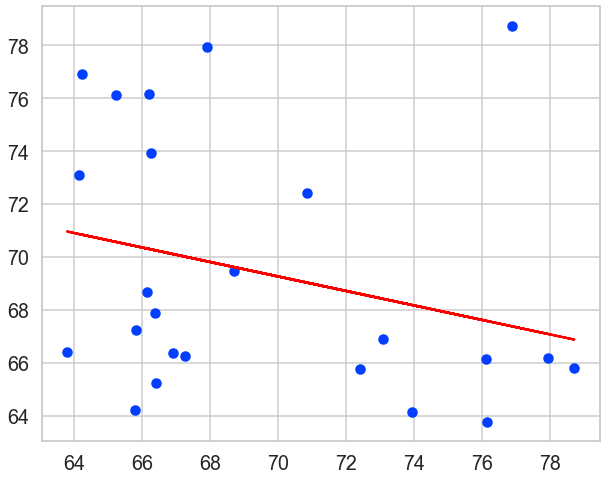

(array([[69.0422456 ],
        [68.61351194],
        [70.42242072],
        [70.8490535 ],
        [67.38535471],
        [66.88693416],
        [70.41348195],
        [70.02007926],
        [70.29483897],
        [68.19529574],
        [70.87621405],
        [68.42425107],
        [70.11667937],
        [70.26011734],
        [69.84610381],
        [67.09673894],
        [70.31325833],
        [67.58648543],
        [70.96976631],
        [70.2554823 ],
        [70.57343183],
        [67.60036659],
        [70.32429044],
        [69.6298152 ]]),
 array([[88.41478228],
        [-0.27346387]]),
 22.383501712858365)

In [125]:
MA(p=1, x=x)

lag_p: 
 [[ 1.         70.8413021 ]
 [ 1.         72.40909114]
 [ 1.         65.79429129]
 [ 1.         64.23418471]
 [ 1.         76.90020446]
 [ 1.         78.72282384]
 [ 1.         65.82697848]
 [ 1.         67.26556957]
 [ 1.         66.26083097]
 [ 1.         73.93842005]
 [ 1.         64.13486426]
 [ 1.         73.10117845]
 [ 1.         66.91232323]
 [ 1.         66.3878007 ]
 [ 1.         67.90176129]
 [ 1.         77.95561177]
 [ 1.         66.19347523]
 [ 1.         76.16471164]
 [ 1.         63.79276329]
 [ 1.         66.40475006]
 [ 1.         65.24207531]
 [ 1.         76.11395115]
 [ 1.         66.15313313]
 [ 1.         68.69268336]] 
 shape: (24, 1)
beta: 
 [[88.41478228]
 [-0.27346387]] 
 shape:  (2, 1)


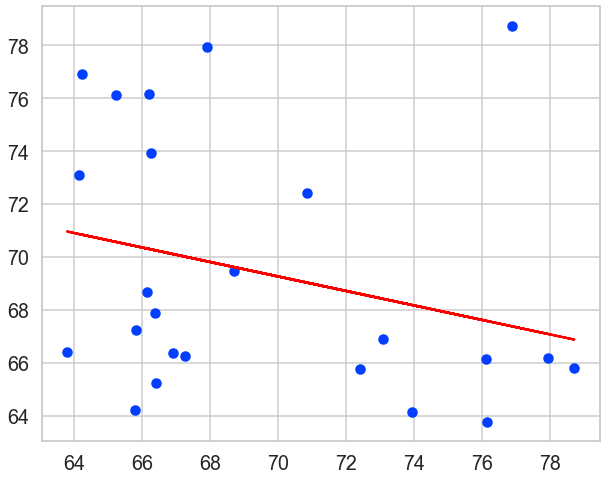

lag_p: 
 [[ 1.         72.40909114]
 [ 1.         65.79429129]
 [ 1.         64.23418471]
 [ 1.         76.90020446]
 [ 1.         78.72282384]
 [ 1.         65.82697848]
 [ 1.         67.26556957]
 [ 1.         66.26083097]
 [ 1.         73.93842005]
 [ 1.         64.13486426]
 [ 1.         73.10117845]
 [ 1.         66.91232323]
 [ 1.         66.3878007 ]
 [ 1.         67.90176129]
 [ 1.         77.95561177]
 [ 1.         66.19347523]
 [ 1.         76.16471164]
 [ 1.         63.79276329]
 [ 1.         66.40475006]
 [ 1.         65.24207531]
 [ 1.         76.11395115]
 [ 1.         66.15313313]
 [ 1.         68.69268336]] 
 shape: (23, 1)
lag_p: 
 [[ 1.         72.40909114 70.8413021 ]
 [ 1.         65.79429129 72.40909114]
 [ 1.         64.23418471 65.79429129]
 [ 1.         76.90020446 64.23418471]
 [ 1.         78.72282384 76.90020446]
 [ 1.         65.82697848 78.72282384]
 [ 1.         67.26556957 65.82697848]
 [ 1.         66.26083097 67.26556957]
 [ 1.         73.93842005 66.26

In [126]:
_, _, mse1 = MA(p=1, x=x)
_, _, mse2 = MA(p=2, x=x)
_, _, mse3 = MA(p=3, x=x)
_, _, mse4 = MA(p=4, x=x)

In [127]:
mse1

22.383501712858365

In [128]:
mse2

21.684538543139812

In [129]:
mse3

18.995369853070468

In [130]:
mse4

18.195767657704497